# Introduction - Using COSINE Metric

In this notebook we demonstrate the use of **LSI (Latent Semantic Indexing)** technique of Information Retrieval context to make trace link recovery between Features and Bug Reports.

We model our study as follows:

* Each bug report title, summary and description compose a single query.
* We use each feature description and title as an entire document that must be returned to the query made

This notebook follows the analysis made in **oracle_v2_analysis**, where we obtained a Cohen's kappa score of _0.41_ between the answers of the researcher and the answers of the volunteers.

# Import Libraries

In [11]:
from mod_finder_util import mod_finder_util
mod_finder_util.add_modules_origin_search_path()

import pandas as pd
import pprint

from modules.models_runner.feat_br_models_runner import Feat_BR_Models_Runner
from modules.utils import aux_functions
from modules.utils import model_evaluator as m_eval
from modules.utils import firefox_dataset_p2 as fd
from modules.utils import similarity_measures as sm
from modules.utils import br_feat_final_matrix_handler as b2f_handler

from matplotlib import pyplot as plt

import warnings; warnings.simplefilter('ignore')

# Load Datasets

In [12]:
bugreports = fd.Datasets.read_selected_bugreports_df()
features = fd.Datasets.read_features_df()

SelectedBugReports.shape: (91, 18)
Features.shape: (21, 8)


# Running LSI Model - Exp-Vol UNION Oracle

In [13]:
models_runner_1 = Feat_BR_Models_Runner()

lsi_model_1 = models_runner_1.run_lsi_model()

evaluator_1 = m_eval.ModelEvaluator(oracle=fd.Feat_BR_Oracles.read_feat_br_expert_volunteers_union_df().T)

sim_thresh = 0.0

lsi_eval_t1 = evaluator_1.evaluate_model(model=lsi_model_1, top_value=1, sim_threshold=sim_thresh)
lsi_eval_t3 = evaluator_1.evaluate_model(model=lsi_model_1, top_value=3, sim_threshold=sim_thresh)
lsi_eval_t5 = evaluator_1.evaluate_model(model=lsi_model_1, top_value=5, sim_threshold=sim_thresh)
lsi_eval_t10 = evaluator_1.evaluate_model(model=lsi_model_1, top_value=10, sim_threshold=sim_thresh)

Features.shape: (21, 8)
SelectedBugReports.shape: (91, 18)
Running LSI model -----
Expert and Volunteers Matrix UNION.shape: (91, 21)


# Similarity Matrix

In [14]:
aux_functions.highlight_df(lsi_model_1.get_sim_matrix().iloc[0:23, 0:14])

Bug_Number,1248267,1248268,1257087,1264988,1267480,1267501,1269348,1269485,1270274,1270983,1271607,1276120,1277937,1278388
feat_name,,,,,,,,,,,,,,
new_awesome_bar,0.320741,0.568394,0.671144,0.931044,0.164355,0.631198,0.181918,0.640709,0.164355,0.29042,0.419515,0.624393,0.586379,0.153829
windows_child_mode,0.0561108,0.406251,0.165129,0.0772069,0.212747,0.206565,0.126042,0.223301,0.212747,0.0972844,0.335712,0.317819,0.216041,0.199122
apz_async_scrolling,0.00122383,0.0295661,0.047032,0.0630632,0.042386,0.260099,0.00498738,0.173511,0.042386,0.0193822,0.134189,0.0447946,0.0756162,0.0396715
browser_customization,0.0252172,0.279508,0.057479,0.139368,0.520398,0.0431226,0.102766,0.0478245,0.520398,0.237966,0.210116,0.0615864,0.233519,0.48707
pdf_viewer,0.00557269,0.048238,0.0127021,0.0170318,0.193004,0.00952956,0.0227099,0.0105686,0.193004,0.0882564,0.00697391,0.022841,0.131052,0.180644
context_menu,0.971288,0.429624,0.44198,0.131035,0.0496182,0.33884,0.0514961,0.430191,0.0496182,0.889817,0.326,0.351809,0.111389,0.0464405
w10_comp,0.190804,0.318948,0.220759,0.23969,0.433016,0.491275,0.179211,0.514725,0.433016,0.372015,0.785257,0.714008,0.468447,0.405285
tts_in_desktop,0.0175157,0.202421,0.0399245,0.0898432,0.400903,0.59806,0.0713803,0.528585,0.400903,0.183324,0.125994,0.0474448,0.260753,0.375228
tts_in_rm,0.0231009,0.256051,0.0526551,0.127672,0.476724,0.430549,0.0941412,0.433093,0.476724,0.217995,0.192482,0.218953,0.259802,0.446193


# Analysis of BR x Feat Generated Traces

In [15]:
handler = b2f_handler.BR_Feat_Final_Matrix_Handler(mode=b2f_handler.HandlerMode.LOAD)
br_2_features_matrix_final = handler.add_mappings_1(columns_names=['Features_IDs_lsi_t1_m',
                                                                   'Features_IDs_lsi_t3_m',
                                                                   'Features_IDs_lsi_t5_m',
                                                                   'Features_IDs_lsi_t10_m',
                                                                   'Features_IDs_orc'],
                                                    trace_matrices=[lsi_eval_t1['trace_links_df'],
                                                                    lsi_eval_t3['trace_links_df'],
                                                                    lsi_eval_t5['trace_links_df'],
                                                                    lsi_eval_t10['trace_links_df'],
                                                                    evaluator_1.get_oracle_df()],
                                                    is_from_model=True)

br_2_features_matrix_final = handler.add_mappings_2(dest_columns_names=['f_names_lsi_t1',
                                                                        'f_names_lsi_t3',
                                                                        'f_names_lsi_t5',
                                                                        'f_names_lsi_t10',
                                                                        'f_names_orc'],
                                                   orig_columns_names=['Features_IDs_lsi_t1_m',
                                                                       'Features_IDs_lsi_t3_m',
                                                                       'Features_IDs_lsi_t5_m',
                                                                       'Features_IDs_lsi_t10_m',
                                                                       'Features_IDs_orc'])
br_2_features_matrix_final.head(10)

SelectedBugReports.shape: (91, 18)
Features.shape: (21, 8)
BR_2_Features Matrix Final.shape: (91, 5)


,bug_title,Features_IDs_exp_m,Features_IDs_vol_m,Features_IDs_exp_vol_union_m,Features_IDs_exp_vol_intersec_m,Features_IDs_lsi_t1_m,Features_IDs_lsi_t3_m,Features_IDs_lsi_t5_m,Features_IDs_lsi_t10_m,Features_IDs_orc,f_names_lsi_t1,f_names_lsi_t3,f_names_lsi_t5,f_names_lsi_t10,f_names_orc
Bug_Number,,,,,,,,,,,,,,,
1248267,"Right click on bookmark item of ""Recently Book...",6,6,6,6,6,1 6 7,1 2 6 7 20,1 2 4 6 7 9 16 17 19 20,6,[[context_menu]],"[[new_awesome_bar], [context_menu], [w10_comp]]","[[new_awesome_bar], [windows_child_mode], [con...","[[new_awesome_bar], [windows_child_mode], [bro...",[[context_menu]]
1248268,"Unable to disable ""Recently bookmarked""",,4,4,,1,1 6 16,1 2 6 16 21,1 2 4 6 7 9 10 16 18 21,4,[[new_awesome_bar]],"[[new_awesome_bar], [context_menu], [webgl2]]","[[new_awesome_bar], [windows_child_mode], [con...","[[new_awesome_bar], [windows_child_mode], [bro...",[[browser_customization]]
1257087,Middle mouse click on history item would not open,,,,,1,1 6 12,1 2 6 7 12,1 2 4 6 7 12 16 19 20 21,,[[new_awesome_bar]],"[[new_awesome_bar], [context_menu], [pointer_l...","[[new_awesome_bar], [windows_child_mode], [con...","[[new_awesome_bar], [windows_child_mode], [bro...",[]
1264988,Scrollbar appears for a moment in the new Awes...,1,1,1,1,1,1 7 20,1 4 7 20 21,1 4 6 7 8 9 14 16 20 21,1,[[new_awesome_bar]],"[[new_awesome_bar], [w10_comp], [notificationb...","[[new_awesome_bar], [browser_customization], [...","[[new_awesome_bar], [browser_customization], [...",[[new_awesome_bar]]
1267480,Intermittent browser/components/preferences/in...,,,,,16,4 9 16,4 7 8 9 16,2 4 5 7 8 9 10 11 16 21,,[[webgl2]],"[[browser_customization], [tts_in_rm], [webgl2]]","[[browser_customization], [w10_comp], [tts_in_...","[[windows_child_mode], [browser_customization]...",[]
1267501,New Private Browsing start-page overflows off ...,3,,3,,1,1 7 8,1 6 7 8 9,1 2 3 6 7 8 9 13 14 21,3,[[new_awesome_bar]],"[[new_awesome_bar], [w10_comp], [tts_in_desktop]]","[[new_awesome_bar], [context_menu], [w10_comp]...","[[new_awesome_bar], [windows_child_mode], [apz...",[[apz_async_scrolling]]
1269348,Show last sync date tooltip on Synced Tabs sid...,,,,,18,1 7 18,1 7 18 19 21,1 2 4 7 9 16 18 19 20 21,,[[indicator_device_perm]],"[[new_awesome_bar], [w10_comp], [indicator_dev...","[[new_awesome_bar], [w10_comp], [indicator_dev...","[[new_awesome_bar], [windows_child_mode], [bro...",[]
1269485,New Private Browsing start-page has white/gray...,3,,3,,1,1 7 8,1 6 7 8 9,1 2 3 6 7 8 9 13 14 17,3,[[new_awesome_bar]],"[[new_awesome_bar], [w10_comp], [tts_in_desktop]]","[[new_awesome_bar], [context_menu], [w10_comp]...","[[new_awesome_bar], [windows_child_mode], [apz...",[[apz_async_scrolling]]
1270274,Intermittent browser_share.jsuncaught exceptio...,,,,,16,4 9 16,4 7 8 9 16,2 4 5 7 8 9 10 11 16 21,,[[webgl2]],"[[browser_customization], [tts_in_rm], [webgl2]]","[[browser_customization], [w10_comp], [tts_in_...","[[windows_child_mode], [browser_customization]...",[]


# Analysis of Precision and Recall

Evaluating LSI Model ----- 


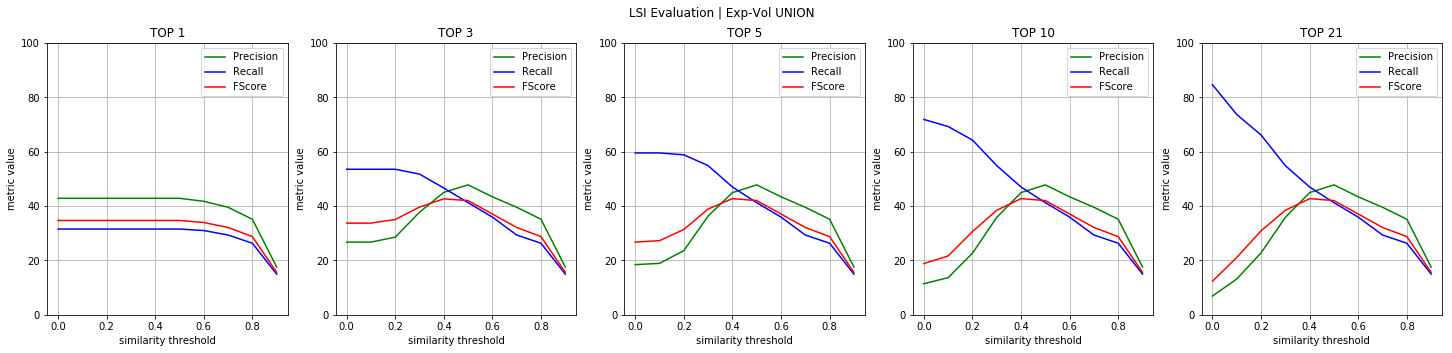

In [16]:
results = evaluator_1.run_evaluator(models=[lsi_model_1], top_values=[1,3,5,10,21], sim_thresholds=[(sm.SimilarityMeasure.COSINE, s_thresh/10) for s_thresh in range(0,10)])
evaluator_1.plot_evaluations_2(title='LSI Evaluation | Exp-Vol UNION', results=results)

# Analysis of False Positives

_Analysis of BR-Feat Traces with Low Precision_

In [17]:
models_runner_2 = Feat_BR_Models_Runner()
lsi_model_2 = models_runner_2.run_lsi_model()

evaluator_2 = m_eval.ModelEvaluator(oracle=fd.Feat_BR_Oracles.read_feat_br_expert_volunteers_union_df().T)
results_2 = evaluator_2.evaluate_model(model=lsi_model_2, top_value=3, sim_threshold=0.0)

Features.shape: (21, 8)
SelectedBugReports.shape: (91, 18)
Running LSI model -----
Expert and Volunteers Matrix UNION.shape: (91, 21)


In [18]:
display(aux_functions.highlight_df(lsi_model_2.get_sim_matrix().iloc[0:23, 0:14]))
display(aux_functions.highlight_df(evaluator_2.get_oracle_df().iloc[0:23, 0:14]))
display(aux_functions.highlight_df(results_2['trace_links_df'].iloc[0:23, 0:14]))

Bug_Number,1248267,1248268,1257087,1264988,1267480,1267501,1269348,1269485,1270274,1270983,1271607,1276120,1277937,1278388
feat_name,,,,,,,,,,,,,,
new_awesome_bar,0.320741,0.568394,0.671144,0.931044,0.164355,0.631198,0.181918,0.640709,0.164355,0.29042,0.419515,0.624393,0.586379,0.153829
windows_child_mode,0.0561108,0.406251,0.165129,0.0772069,0.212747,0.206565,0.126042,0.223301,0.212747,0.0972844,0.335712,0.317819,0.216041,0.199122
apz_async_scrolling,0.00122383,0.0295661,0.047032,0.0630632,0.042386,0.260099,0.00498738,0.173511,0.042386,0.0193822,0.134189,0.0447946,0.0756162,0.0396715
browser_customization,0.0252172,0.279508,0.057479,0.139368,0.520398,0.0431226,0.102766,0.0478245,0.520398,0.237966,0.210116,0.0615864,0.233519,0.48707
pdf_viewer,0.00557269,0.048238,0.0127021,0.0170318,0.193004,0.00952956,0.0227099,0.0105686,0.193004,0.0882564,0.00697391,0.022841,0.131052,0.180644
context_menu,0.971288,0.429624,0.44198,0.131035,0.0496182,0.33884,0.0514961,0.430191,0.0496182,0.889817,0.326,0.351809,0.111389,0.0464405
w10_comp,0.190804,0.318948,0.220759,0.23969,0.433016,0.491275,0.179211,0.514725,0.433016,0.372015,0.785257,0.714008,0.468447,0.405285
tts_in_desktop,0.0175157,0.202421,0.0399245,0.0898432,0.400903,0.59806,0.0713803,0.528585,0.400903,0.183324,0.125994,0.0474448,0.260753,0.375228
tts_in_rm,0.0231009,0.256051,0.0526551,0.127672,0.476724,0.430549,0.0941412,0.433093,0.476724,0.217995,0.192482,0.218953,0.259802,0.446193


Bug_Number,1248267,1248268,1257087,1264988,1267480,1267501,1269348,1269485,1270274,1270983,1271607,1276120,1277937,1278388
new_awesome_bar,0,0,0,1,0,0,0,0,0,0,1,1,1,1
windows_child_mode,0,0,0,0,0,0,0,0,0,0,0,0,0,0
apz_async_scrolling,0,0,0,0,0,1,0,1,0,0,0,0,0,0
browser_customization,0,1,0,0,0,0,0,0,0,0,0,0,0,0
pdf_viewer,0,0,0,0,0,0,0,0,0,0,0,0,0,0
context_menu,1,0,0,0,0,0,0,0,0,1,0,0,0,0
w10_comp,0,0,0,0,0,0,0,0,0,0,0,0,0,0
tts_in_desktop,0,0,0,0,0,0,0,0,0,0,0,0,0,0
tts_in_rm,0,0,0,0,0,0,0,0,0,0,0,0,0,0
webgl_comp,0,0,0,0,0,0,0,0,0,0,0,0,0,0


Bug_Number,1248267,1248268,1257087,1264988,1267480,1267501,1269348,1269485,1270274,1270983,1271607,1276120,1277937,1278388
feat_name,,,,,,,,,,,,,,
new_awesome_bar,1,1,1,1,0,1,1,1,0,1,1,1,1,0
windows_child_mode,0,0,0,0,0,0,0,0,0,0,0,0,0,0
apz_async_scrolling,0,0,0,0,0,0,0,0,0,0,0,0,0,0
browser_customization,0,0,0,0,1,0,0,0,1,0,0,0,0,1
pdf_viewer,0,0,0,0,0,0,0,0,0,0,0,0,0,0
context_menu,1,1,1,0,0,0,0,0,0,1,0,1,0,0
w10_comp,1,0,0,1,0,1,1,1,0,1,1,1,1,0
tts_in_desktop,0,0,0,0,0,1,0,1,0,0,0,0,0,0
tts_in_rm,0,0,0,0,1,0,0,0,1,0,0,0,0,1


In [19]:
eval_df = results_2['eval_df']

In [20]:
new_df = pd.concat([br_2_features_matrix_final,eval_df], axis=1)
print(new_df.shape)
display(new_df.head(10))

(91, 18)


,bug_title,Features_IDs_exp_m,Features_IDs_vol_m,Features_IDs_exp_vol_union_m,Features_IDs_exp_vol_intersec_m,Features_IDs_lsi_t1_m,Features_IDs_lsi_t3_m,Features_IDs_lsi_t5_m,Features_IDs_lsi_t10_m,Features_IDs_orc,f_names_lsi_t1,f_names_lsi_t3,f_names_lsi_t5,f_names_lsi_t10,f_names_orc,precision,recall,fscore
Bug_Number,,,,,,,,,,,,,,,,,,
1248267,"Right click on bookmark item of ""Recently Book...",6,6,6,6,6,1 6 7,1 2 6 7 20,1 2 4 6 7 9 16 17 19 20,6,[[context_menu]],"[[new_awesome_bar], [context_menu], [w10_comp]]","[[new_awesome_bar], [windows_child_mode], [con...","[[new_awesome_bar], [windows_child_mode], [bro...",[[context_menu]],0.333333,1.0,0.5
1248268,"Unable to disable ""Recently bookmarked""",,4,4,,1,1 6 16,1 2 6 16 21,1 2 4 6 7 9 10 16 18 21,4,[[new_awesome_bar]],"[[new_awesome_bar], [context_menu], [webgl2]]","[[new_awesome_bar], [windows_child_mode], [con...","[[new_awesome_bar], [windows_child_mode], [bro...",[[browser_customization]],0.000000,0.0,0.0
1257087,Middle mouse click on history item would not open,,,,,1,1 6 12,1 2 6 7 12,1 2 4 6 7 12 16 19 20 21,,[[new_awesome_bar]],"[[new_awesome_bar], [context_menu], [pointer_l...","[[new_awesome_bar], [windows_child_mode], [con...","[[new_awesome_bar], [windows_child_mode], [bro...",[],0.000000,0.0,0.0
1264988,Scrollbar appears for a moment in the new Awes...,1,1,1,1,1,1 7 20,1 4 7 20 21,1 4 6 7 8 9 14 16 20 21,1,[[new_awesome_bar]],"[[new_awesome_bar], [w10_comp], [notificationb...","[[new_awesome_bar], [browser_customization], [...","[[new_awesome_bar], [browser_customization], [...",[[new_awesome_bar]],0.333333,1.0,0.5
1267480,Intermittent browser/components/preferences/in...,,,,,16,4 9 16,4 7 8 9 16,2 4 5 7 8 9 10 11 16 21,,[[webgl2]],"[[browser_customization], [tts_in_rm], [webgl2]]","[[browser_customization], [w10_comp], [tts_in_...","[[windows_child_mode], [browser_customization]...",[],0.000000,0.0,0.0
1267501,New Private Browsing start-page overflows off ...,3,,3,,1,1 7 8,1 6 7 8 9,1 2 3 6 7 8 9 13 14 21,3,[[new_awesome_bar]],"[[new_awesome_bar], [w10_comp], [tts_in_desktop]]","[[new_awesome_bar], [context_menu], [w10_comp]...","[[new_awesome_bar], [windows_child_mode], [apz...",[[apz_async_scrolling]],0.000000,0.0,0.0
1269348,Show last sync date tooltip on Synced Tabs sid...,,,,,18,1 7 18,1 7 18 19 21,1 2 4 7 9 16 18 19 20 21,,[[indicator_device_perm]],"[[new_awesome_bar], [w10_comp], [indicator_dev...","[[new_awesome_bar], [w10_comp], [indicator_dev...","[[new_awesome_bar], [windows_child_mode], [bro...",[],0.000000,0.0,0.0
1269485,New Private Browsing start-page has white/gray...,3,,3,,1,1 7 8,1 6 7 8 9,1 2 3 6 7 8 9 13 14 17,3,[[new_awesome_bar]],"[[new_awesome_bar], [w10_comp], [tts_in_desktop]]","[[new_awesome_bar], [context_menu], [w10_comp]...","[[new_awesome_bar], [windows_child_mode], [apz...",[[apz_async_scrolling]],0.000000,0.0,0.0
1270274,Intermittent browser_share.jsuncaught exceptio...,,,,,16,4 9 16,4 7 8 9 16,2 4 5 7 8 9 10 11 16 21,,[[webgl2]],"[[browser_customization], [tts_in_rm], [webgl2]]","[[browser_customization], [w10_comp], [tts_in_...","[[windows_child_mode], [browser_customization]...",[],0.000000,0.0,0.0


,bug_title,Features_IDs_exp_m,Features_IDs_vol_m,Features_IDs_exp_vol_union_m,Features_IDs_exp_vol_intersec_m,Features_IDs_lsi_t1_m,Features_IDs_lsi_t3_m,Features_IDs_lsi_t5_m,Features_IDs_lsi_t10_m,Features_IDs_orc,f_names_lsi_t1,f_names_lsi_t3,f_names_lsi_t5,f_names_lsi_t10,f_names_orc,precision,recall,fscore
Bug_Number,,,,,,,,,,,,,,,,,,
1352539,Move defaultenginename pref setting into list....,1,1,1,1,4,1 2 4,1 2 4 14 19,1 2 4 6 7 9 12 14 16 19,1,[[browser_customization]],"[[new_awesome_bar], [windows_child_mode], [bro...","[[new_awesome_bar], [windows_child_mode], [bro...","[[new_awesome_bar], [windows_child_mode], [bro...",[[new_awesome_bar]],0.333333,1.000000,0.500000
1353831,OneOff block in search bar doesn't update text...,1,1 4,1 4,1,4,1 4 6,1 4 6 9 21,1 2 4 6 7 8 9 18 20 21,1 4,[[browser_customization]],"[[new_awesome_bar], [browser_customization], [...","[[new_awesome_bar], [browser_customization], [...","[[new_awesome_bar], [windows_child_mode], [bro...","[[new_awesome_bar], [browser_customization]]",0.666667,1.000000,0.800000
1357085,Confirm your account pref screen should no lon...,,,,,18,2 7 18,2 7 9 18 19,1 2 7 9 10 11 14 18 19 21,,[[indicator_device_perm]],"[[windows_child_mode], [w10_comp], [indicator_...","[[windows_child_mode], [w10_comp], [tts_in_rm]...","[[new_awesome_bar], [windows_child_mode], [w10...",[],0.000000,0.000000,0.000000
1357458,After Customization - typed text in the Awesom...,1 4,1 4 9 15 18 20,1 4 9 15 18 20,1 4,1,1 4 8,1 4 6 8 9,1 3 4 6 7 8 9 19 20 21,1 4 9 15 18 20,[[new_awesome_bar]],"[[new_awesome_bar], [browser_customization], [...","[[new_awesome_bar], [browser_customization], [...","[[new_awesome_bar], [apz_async_scrolling], [br...","[[new_awesome_bar], [browser_customization], [...",0.666667,0.333333,0.444444
1365887,Can't open resource:///modules/ from the locat...,1,1 5 6 8 10 11 14 16,1 5 6 8 10 11 14 16,1,1,1 6 19,1 5 6 19 20,1 4 5 6 7 13 14 17 19 20,1 5 6 8 10 11 14 16,[[new_awesome_bar]],"[[new_awesome_bar], [context_menu], [flash_sup...","[[new_awesome_bar], [pdf_viewer], [context_men...","[[new_awesome_bar], [browser_customization], [...","[[new_awesome_bar], [pdf_viewer], [context_men...",0.666667,0.250000,0.363636
1408361,Received tab is truncated prematurely in notif...,20,1 20,1 20,20,18,1 18 20,1 7 8 18 20,1 4 6 7 8 9 15 16 18 20,1 20,[[indicator_device_perm]],"[[new_awesome_bar], [indicator_device_perm], [...","[[new_awesome_bar], [w10_comp], [tts_in_deskto...","[[new_awesome_bar], [browser_customization], [...","[[new_awesome_bar], [notificationbox]]",0.666667,1.000000,0.800000
1430603,Restrict BROWSER_*_DEFAULT probes to parent-pr...,,18 21,18 21,,13,3 4 13,3 4 8 9 13,2 3 4 6 8 9 13 14 16 19,18 21,[[webm_eme]],"[[apz_async_scrolling], [browser_customization...","[[apz_async_scrolling], [browser_customization...","[[windows_child_mode], [apz_async_scrolling], ...","[[indicator_device_perm], [update_directory]]",0.000000,0.000000,0.000000
1432915,Do not write the kMDItemWhereFroms xattr metad...,15,1 15,1 15,15,9,2 5 9,1 2 5 9 19,1 2 4 5 9 12 16 17 19 21,1 15,[[tts_in_rm]],"[[windows_child_mode], [pdf_viewer], [tts_in_rm]]","[[new_awesome_bar], [windows_child_mode], [pdf...","[[new_awesome_bar], [windows_child_mode], [bro...","[[new_awesome_bar], [downloads_dropmaker]]",0.000000,0.000000,0.000000
1449700,refactor addTab/moveTabTo,,4,4,,1,1 7 12,1 2 7 12 19,1 2 4 6 7 12 14 16 18 19,4,[[new_awesome_bar]],"[[new_awesome_bar], [w10_comp], [pointer_lock_...","[[new_awesome_bar], [windows_child_mode], [w10...","[[new_awesome_bar], [windows_child_mode], [bro...",[[browser_customization]],0.000000,0.000000,0.000000


# Analysis of False Negatives

_Analysis of BR-Feat Traces with Low Recall_